In [19]:
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2

In [20]:
import shutil
shutil.copy('/content/drive/My Drive/Project/FingerSpell ASL/X_array.npy','./')
print("Moved X")
shutil.copy('/content/drive/My Drive/Project/FingerSpell ASL/Y_array.npy','./')
print("Moved Y")

Moved X
Moved Y


In [21]:
X=np.load('./X_array.npy')
Y=np.load('./Y_array.npy')
print(X.shape)
print(Y.shape)
print(np.unique(Y))


(11600, 50, 50, 1)
(11600,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [22]:
Y = np_utils.to_categorical(Y)
Y.shape

(11600, 16)

In [23]:
categories = Y.shape[1]
print(categories)

16


In [24]:
X, Y = shuffle(X, Y, random_state=0)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(8120, 50, 50, 1) (3480, 50, 50, 1)
(8120, 16) (3480, 16)


In [26]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation = 'relu',input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [27]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [28]:
epochs=50
history = model.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/50
64/64 [==============================] - 1s 11ms/step - loss: 1.4383 - accuracy: 0.5512 - val_loss: 0.3234 - val_accuracy: 0.9052
Epoch 2/50
64/64 [==============================] - 0s 8ms/step - loss: 0.2716 - accuracy: 0.9151 - val_loss: 0.0917 - val_accuracy: 0.9770
Epoch 3/50
64/64 [==============================] - 0s 8ms/step - loss: 0.1065 - accuracy: 0.9683 - val_loss: 0.0395 - val_accuracy: 0.9922
Epoch 4/50
64/64 [==============================] - 1s 8ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0186 - val_accuracy: 0.9951
Epoch 5/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.0129 - val_accuracy: 0.9963
Epoch 6/50
64/64 [==============================] - 1s 8ms/step - loss: 0.0271 - accuracy: 0.9925 - val_loss: 0.0124 - val_accuracy: 0.9966
Epoch 7/50
64/64 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.0099 - val_accuracy: 0.9974
Epoch 8/50
64/64 [=

In [29]:
def save(filename,colab=False,path='./'):
  if colab:
    path=f'/content/drive/My Drive/Project/FingerSpell ASL/{filename}'
    model.save(path)
    print("Saved To Colab:\n",path)
  else:
    model.save('./')



In [30]:

from datetime import datetime
import pytz
time=datetime.now(pytz.timezone("Asia/Kathmandu"))
time=time.strftime('%d-%m_%H-%M%p')
filename=f'E{epochs}-C{categories}@{time}.h5'
print(filename)

save(filename,colab=True)

E50-C16@10-11_10-52AM.h5
Saved To Colab:
 /content/drive/My Drive/Project/FingerSpell ASL/E50-C16@10-11_10-52AM.h5


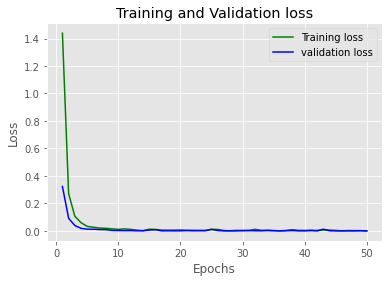

/content/drive/My Drive/Project/FingerSpell ASL/LOSS_E50-C16@10-11_10-52AM.png


In [31]:
colab_save_path="/content/drive/My Drive/Project/FingerSpell ASL/"
imgfilename='LOSS_'+str(filename.split('.')[0])+'.png'
filepath=os.path.join(colab_save_path,imgfilename)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
epochs=50

loss_train = history.history['loss']
loss_val = history.history['val_loss']
rangeEpoc=epochs+1
epoc = range(1,rangeEpoc)
plt.plot(epoc, loss_train, 'g', label='Training loss')
plt.plot(epoc, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(filepath,bbox_inches='tight')
plt.show()
print(filepath)


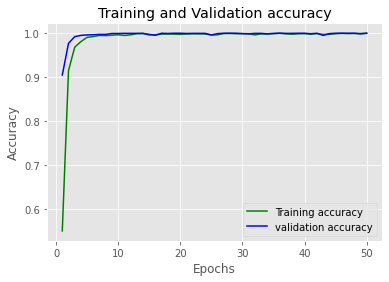

/content/drive/My Drive/Project/FingerSpell ASL/ACCURACY_E50-C16@10-11_10-52AM.png


In [32]:
imgfilename='ACCURACY_'+str(filename.split('.')[0])+'.png'
filepath=os.path.join(colab_save_path,imgfilename)
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,rangeEpoc)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(filepath,bbox_inches='tight')
plt.show()

print(filepath)
